In [1]:
import xarray as xr
import glob
import warnings
import seaborn as sns
import dask.dataframe as dd
import numpy as np
import pandas as pd
from scipy import stats
from facets import facets
from mls import *
from plots import *
from utility import *
import matplotlib.pyplot as plt
from matplotlib import ticker 
import matplotlib as mpl
%matplotlib inline
warnings.filterwarnings('ignore')
#dir(dd)

/home/pankaj/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/pankaj/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarni

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault) 
mpl.rcParams["xtick.top"]="on"
mpl.rcParams["xtick.bottom"]="on"
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['boxplot.meanprops.marker']='o'
mpl.rcParams['boxplot.meanprops.markersize']=4

In [3]:
#select month
mon_no=10
months=['January','February','March','April','May','June','July','August','September','October','November','December']
mon_name=months[mon_no-1]
print mon_name

October


In [4]:
#constatnts
du=2.69E16*1E-12*1E-5
yrs=np.arange(1979,2018)
#print(yrs)
pot=np.arange(325,1000,25)
tsize=10

In [5]:
# file path
merged='/home/pankaj/phd/saturation/data/comb/'
floc='/home/pankaj/phd/saturation/plot/'+mon_name+'/'
tco='/home/pankaj/phd/saturation/data/omi/'
par='/home/pankaj/phd/saturation/data/partial/'
eps=floc+'eps/'
pdf=floc+'pdf/'
png=floc+'png/'
[make_dir(folder) for folder in [merged,floc,tco,par,eps,pdf,png]]

[None, None, None, None, None, None, None]

In [6]:
# Station details
stations=['davs','spol', 'neum', 'myth', 'syow',  'marb','mcmu','mirn']
names=['Davis', 'South Pole', 'Neumayer', 'Maitri', 'Syowa',  'Marambio','McMurdo','Mirny']
clrs=['violet','magenta','orange','olive','red','blue','green','turquoise']
cte_lat=[-69,-90, -71, -70, -69,  -64, -79, 66]
cte_lon=[78, 335,  352,  11,  40,   303, 167, 93]
order=[2,4,1,5,6,3,0,7]
stations,names,clrs,cte_lat,cte_lon=[[stations[i] for i in order],[names[i] for i in order],
 [clrs[i] for i in order],[cte_lat[i] for i in order],[cte_lon[i] for i in order]]
print names

['Neumayer', 'Syowa', 'South Pole', 'Marambio', 'McMurdo', 'Maitri', 'Davis', 'Mirny']


In [7]:
def sond_box_data(dsat,month=10):
    x=dsat.resample('M').mean() # TO PUT NAN IN PLACES WHERE THERE IS NO DATA
    y=x[x.index.month==10]
    y=y[(y.index.year==1981)]
    x=dsat[dsat.index.month==month]
    return pd.concat([x,y],axis=0).sort_index()

def sat_box_data(dsat,month=10):
    x=dsat.resample('M').mean() # TO PUT NAN IN PLACES WHERE THERE IS NO DATA
    y=x[x.index.month==10]
    y=y[(y.index.year>=1992)&(y.index.year<=1995)|(y.index.year==2000)|(y.index.year==2003)]
    x=dsat[dsat.index.month==month]
    return pd.concat([x,y],axis=0).sort_index()

In [8]:
pt=400
tot=pd.DataFrame([])
for stn,name,clr in zip(stations,names,clrs):
    print(stn)
    df=dd.read_csv(merged+stn+'/*',sep='\s+',parse_dates={'Date':['Year','Mon','Day']})
    df=df[df['Con']<20][df['PoT']==pt][abs(df['eql'])>=65][df['vmr']>0.000001].compute()
    tot=pd.concat([tot,df],axis=0)
tot=tot.groupby(tot.Date).mean()
tt=tot

neum
syow
spol
marb
mcmu
myth
davs
mirn


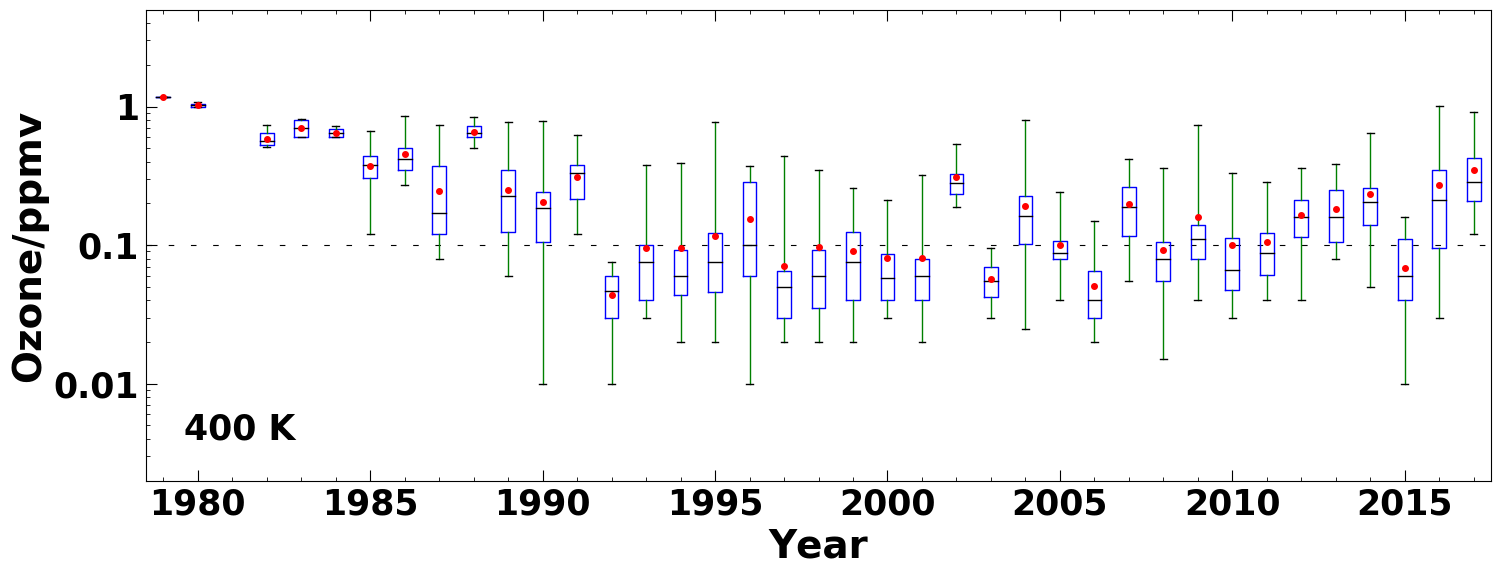

In [14]:
# sonde boxplot
fig, axes = facets(1,1, width=15, aspect=0.35, top_pad=0.1, bottom_pad=0.9, left_pad=1.45, right_pad=0.1)
ax=axes[0]
tick_font=25
label_font=28
ax.set_yscale('log') 
tot=sond_box_data(tt)
bp=tot.boxplot(column='vmr', by=tot.index.year, ax=ax,return_type='dict',
                sym='k+',widths=0.4,manage_xticks=True,showmeans=True,whis=[1,100], showfliers=False) 
ax.set_title('400 K',y=0.07,x=0.07,fontsize=tick_font,fontweight='bold')
[[item.set_color('b') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('k') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_color('g') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_markerfacecolor('r') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_markeredgecolor('r') for item in bp[key]['means']] for key in bp.keys()]
ax.axhline(0.1, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=tick_font,fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(logformat))
ax.tick_params(axis='x',which='major',length=8, pad=5)
ax.tick_params(axis='y',which='major',length=8, pad=5)
ax.tick_params(axis='x',which='minor',length=3, pad=5)
ax.tick_params(axis='y',which='minor',length=3, pad=5)
loc=np.arange(2,51,5)
ax.xaxis.set_major_locator(ticker.FixedLocator(loc))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
year=np.arange(1980,2018,5)
ax.set_xticklabels(year,fontsize=tick_font,fontweight='bold')
ax.set_ylabel('Ozone/ppmv',fontsize=label_font,fontweight='bold')
ax.set_xlabel('Year',fontsize=label_font,fontweight='bold')
ax.set_ylim([0.002,5])
ax.minorticks_on()
ax.grid(False)
fig.suptitle('')
figsave(fig,'sonde12',floc)
plt.show()

In [10]:
sat=pd.read_csv('eql_sat',sep='\t',parse_dates=['Date']).set_index('Date')
sat=sat[sat.index.month==10].sort_index()
sat=sat_box_data(sat)
sat[sat.Sat>5]=np.nan
sat.head()

,Eql,Sat,Sond,Station
Date,,,,
1985-10-02,-73.6,1.696,0.67,Neumayer
1985-10-06,-71.0,1.418,0.62,Neumayer
1985-10-08,-84.0,0.812,0.45,Neumayer
1985-10-10,-68.2,0.859,0.39,Neumayer
1985-10-12,-73.5,1.275,0.34,Neumayer


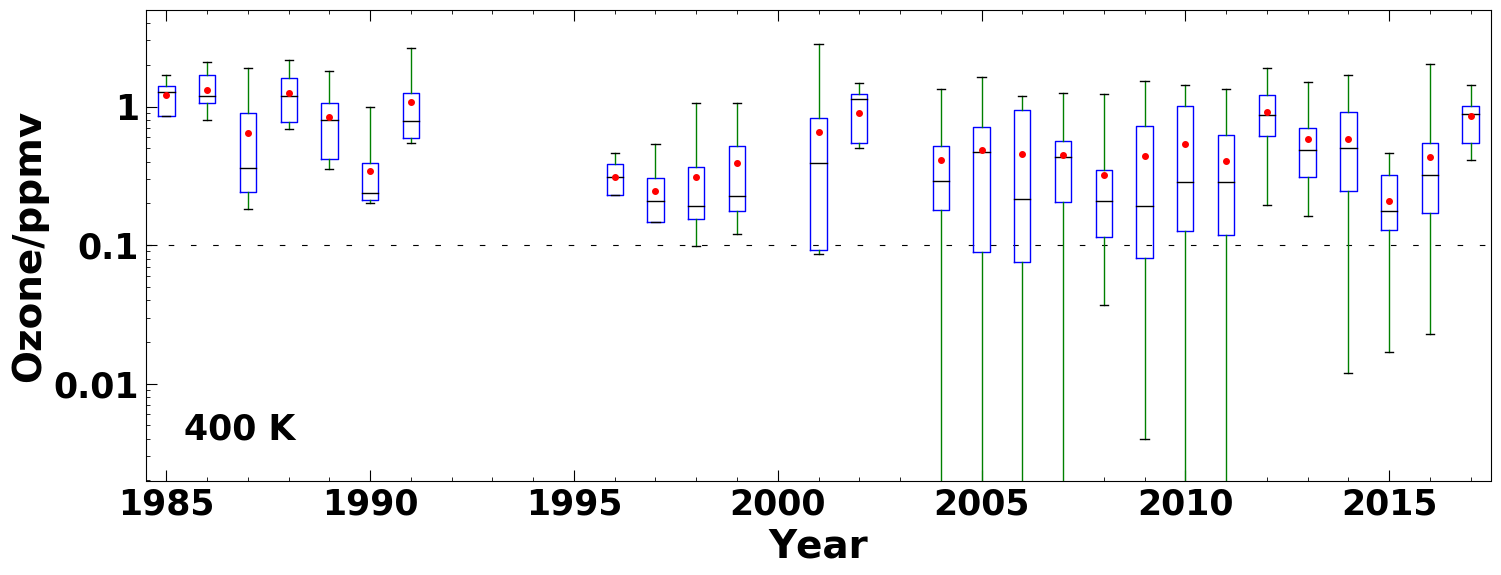

In [11]:
# sonde boxplot
fig, axes = facets(1,1, width=15, aspect=0.35, top_pad=0.1, bottom_pad=0.8, left_pad=1.45, right_pad=0.1)
ax=axes[0]
tick_font=25
label_font=28
ax.set_yscale('log') 
bp=sat.boxplot(column='Sat', by=sat.index.year, ax=ax,return_type='dict',
                sym='k+',widths=0.4,manage_xticks=True,showmeans=True,whis=[1,100], showfliers=False) 
ax.set_title('400 K',y=0.07,x=0.07,fontsize=tick_font,fontweight='bold')
[[item.set_color('b') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('k') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_color('g') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_markerfacecolor('r') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_markeredgecolor('r') for item in bp[key]['means']] for key in bp.keys()]
ax.axhline(0.1, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=tick_font,fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(logformat))
ax.tick_params(axis='x',which='major',length=8, pad=5)
ax.tick_params(axis='y',which='major',length=8, pad=5)
ax.tick_params(axis='x',which='minor',length=3, pad=5)
ax.tick_params(axis='y',which='minor',length=3, pad=5)
loc=np.arange(1,51,5)
ax.xaxis.set_major_locator(ticker.FixedLocator(loc))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
year=np.arange(1985,2018,5)
ax.set_xticklabels(year,fontsize=tick_font,fontweight='bold')
ax.set_ylabel('Ozone/ppmv',fontsize=label_font,fontweight='bold')
ax.set_xlabel('Year',fontsize=label_font,fontweight='bold')
ax.set_ylim([0.002,5])
ax.minorticks_on()
ax.grid(False)
fig.suptitle('')
figsave(fig,'S8',floc)
plt.show()